In [5]:
import os
import cv2
import glob
import urllib.request
import random
import zipfile
from tqdm import tqdm
import requests
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
class DownloadProgressBar(tqdm):
    def update_to(self, b=1, bsize=1, tsize=None):
        if tsize is not None:
            self.total = tsize
        self.update(b * bsize - self.n)


def download_url(url, output_path):
    with DownloadProgressBar(unit='B', unit_scale=True,
                             miniters=1, desc=url.split('/')[-1]) as t:
        urllib.request.urlretrieve(url, filename=output_path, reporthook=t.update_to)

# DenoiseSeg Mouse and Mouse s&p

In [9]:
url = 'https://zenodo.org/record/5157001/files/Mouse_n0.zip?download=1'
file_name = "DenoiSeg_Mouse.zip"

download_url(url,file_name)    
with zipfile.ZipFile(file_name, 'r') as zip_ref:
        zip_ref.extractall("./DenoiSeg_Mouse")

Mouse_n0.zip?download=1: 12.4MB [00:31, 391kB/s]                             


In [10]:
train_data = np.load("./DenoiSeg_Mouse/Mouse_n0/train/train_data.npz")
test_data = np.load("./DenoiSeg_Mouse/Mouse_n0/test/test_data.npz")
train = train_data["X_train"]
val = train_data["X_val"]
test = test_data["X_test"]

### DenoiSeg Mouse

In [11]:
train_noisy = train.astype(np.float32) + np.random.normal(0,20,train.shape)
val_noisy = val.astype(np.float32) + np.random.normal(0,20,val.shape)
test_noisy = test.astype(np.float32) + np.random.normal(0,20,test.shape)

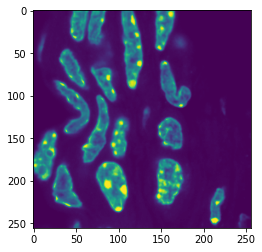

In [12]:
plt.imshow(test[0,:,:])

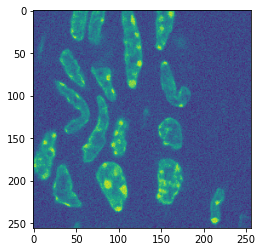

In [13]:
plt.imshow(test_noisy[0,:,:])

In [ ]:
np.savez("DenoiseSeg_Mouse_20.npz",train=np.array(train_noisy),val=np.array(val_noisy),test_GT=np.array(test),test=np.array(test_noisy))

### DenoiSeg Mouse s&p

In [14]:
train_noisy = train.astype(np.float32) + np.random.poisson(1, train.shape) + np.random.normal(0,10,train.shape)
random_change_train = np.random.uniform(0,1,train.shape)
train_noisy[np.where(random_change_train>0.97)] = 0.0
train_noisy[np.where(random_change_train>0.985)] = 255.0


val_noisy = val.astype(np.float32) + np.random.poisson(1, val.shape)+np.random.normal(0,10,val.shape)
random_change_val = np.random.uniform(0,1,val.shape)
val_noisy[np.where(random_change_val>0.97)] = 0.0
val_noisy[np.where(random_change_val>0.985)] = 255.0


test_noisy = test.astype(np.float32) +np.random.poisson(1, test.shape)+ np.random.normal(0,10,test.shape)
random_change_test = np.random.uniform(0,1,test.shape)
test_noisy[np.where(random_change_test>0.97)] = 0.0
test_noisy[np.where(random_change_test>0.985)] = 255.0

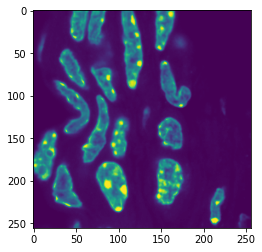

In [15]:
plt.imshow(test[0,:,:])

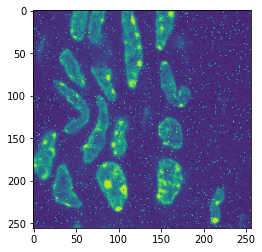

In [16]:
plt.imshow(test_noisy[0,:,:])

In [17]:
np.savez("DenoiseSeg_Mouse_s&p.npz",train=np.array(train_noisy),val=np.array(val_noisy),test_GT=np.array(test),test=np.array(test_noisy))

# DenoiseSeg Flywing

In [18]:
url = 'https://zenodo.org/record/5156991/files/Flywing_n0.zip?download=1'
file_name = "DenoiSeg_Flywing.zip"

download_url(url,file_name)    
with zipfile.ZipFile(file_name, 'r') as zip_ref:
        zip_ref.extractall("./DenoiSeg_Flywing")

Flywing_n0.zip?download=1: 49.2MB [01:49, 450kB/s]                               


In [19]:
train_data = np.load("./DenoiSeg_Flywing/Flywing_n0/train/train_data.npz")
test_data = np.load("./DenoiSeg_Flywing/Flywing_n0/test/test_data.npz")
train = train_data["X_train"]
val = train_data["X_val"]
test = test_data["X_test"]

In [20]:
train_noisy = train.astype(np.float32) + np.random.normal(0,70,train.shape)
val_noisy = val.astype(np.float32) + np.random.normal(0,70,val.shape)
test_noisy = test.astype(np.float32) + np.random.normal(0,70,test.shape)

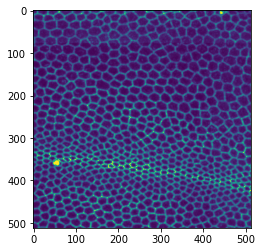

In [21]:
plt.imshow(test[0,:,:])

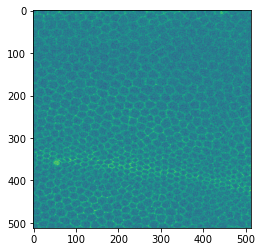

In [22]:
plt.imshow(test_noisy[0,:,:])

In [23]:
np.savez("DenoiseSeg_Flywing.npz",train=np.array(train_noisy),val=np.array(val_noisy),test_GT=np.array(test),test=np.array(test_noisy))

# W2S Datasets

In [27]:
from sklearn.feature_extraction import image

In [ ]:
url = 'https://zenodo.org/record/3895807/files/W2S_raw.zip?download=1'
file_name = "W2S.zip"

download_url(url,file_name)    
with zipfile.ZipFile(file_name, 'r') as zip_ref:
        zip_ref.extractall("./W2S")

### avg1 datasets (please change channel)

In [25]:
channel = 0

In [28]:
img_width = 512
img_height = 512
patch_size = 128

index = 249
num_patches = int(float(img_width*img_height)/float(patch_size**2)*2)
train_files = [f"./W2S/raw/Image{str(i).zfill(3)}/wf_channel{channel}.npy" for i in range(1,81)]
random.shuffle(train_files)
val_files = train_files[:12]
train_files = train_files[12:]
train_patches = np.zeros(shape=(len(train_files)*num_patches,patch_size,patch_size))
for i,file in enumerate(train_files):
    x = np.load(file)
    img = x[index,:,:]
    train_patches[i*num_patches:(i+1)*num_patches] = image.extract_patches_2d(img,(patch_size,patch_size), max_patches=num_patches,random_state=i)

val_patches = np.zeros(shape=(len(val_files)*num_patches,patch_size,patch_size))
for i,file in enumerate(val_files):
    x = np.load(file)
    img = x[index,:,:]
    val_patches[i*num_patches:(i+1)*num_patches] = image.extract_patches_2d(img,(patch_size,patch_size), max_patches=num_patches,random_state=i)
    
test_files = [f"./W2S/raw/Image{str(i).zfill(3)}/wf_channel{channel}.npy" for i in range(81,121)]
test_array_noisy = []
test_array_gt = []
for i,file in enumerate(test_files):
    x = np.load(file)
    img = x[index,:,:]
    test_array_noisy.append(img)
    test_array_gt.append(np.mean(x,axis=0))

In [33]:
test_array_noisy = np.array(test_array_noisy)
test_array_gt = np.array(test_array_gt)

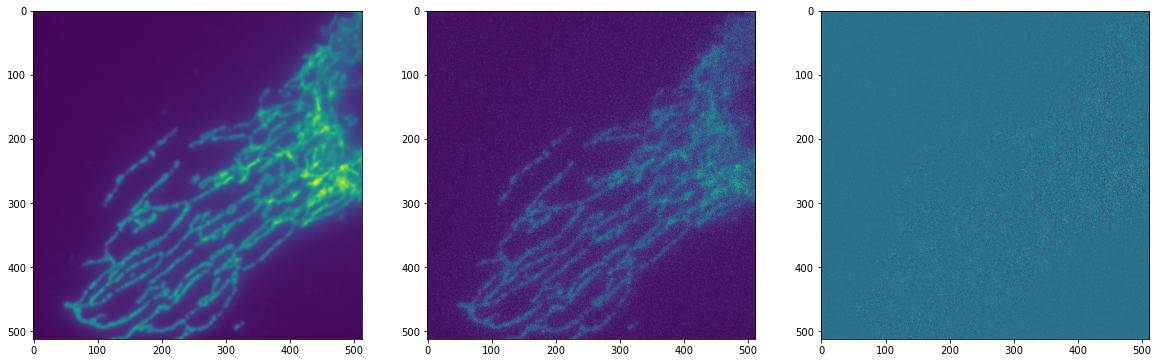

In [52]:
fig, axs = plt.subplots(1, 3,figsize=(20,10))
axs[0].imshow(test_array_gt[1,:,:])
axs[1].imshow(test_array_noisy[1,:,:])
axs[2].imshow(test_array_noisy[1,:,:]-test_array_gt[1,:,:])

In [ ]:
np.savez(f"w2s_avg1_channel_{channel}.npz",train=np.array(train_patches),val=np.array(val_patches),test_GT=np.array(test_array_gt),test=np.array(test_array_noisy))

### Avg16 Datasets

In [53]:
channel = 0

In [54]:
img_width = 512
img_height = 512
patch_size = 128

num_patches = int(float(img_width*img_height)/float(patch_size**2)*2)
train_files = [f"./W2S/raw/Image{str(i).zfill(3)}/wf_channel{channel}.npy" for i in range(1,81)]
random.shuffle(train_files)
val_files = train_files[:12]
train_files = train_files[12:]
train_patches = np.zeros(shape=(len(train_files)*num_patches,patch_size,patch_size))
for i,file in enumerate(train_files):
    x = np.load(file)
    img = np.mean(x[:16,:,:],axis=0)
    train_patches[i*num_patches:(i+1)*num_patches] = image.extract_patches_2d(img,(patch_size,patch_size), max_patches=num_patches,random_state=i)

val_patches = np.zeros(shape=(len(val_files)*num_patches,patch_size,patch_size))
for i,file in enumerate(val_files):
    x = np.load(file)
    img = np.mean(x[:16,:,:],axis=0)
    val_patches[i*num_patches:(i+1)*num_patches] = image.extract_patches_2d(img,(patch_size,patch_size), max_patches=num_patches,random_state=i)
    
test_files = [f"./W2S/raw/Image{str(i).zfill(3)}/wf_channel{channel}.npy" for i in range(81,121)]
test_array_noisy = []
test_array_gt = []
for i,file in enumerate(test_files):
    x = np.load(file)
    img = np.mean(x[:16,:,:],axis=0)
    test_array_noisy.append(img)
    test_array_gt.append(np.mean(x,axis=0))

In [55]:
test_array_noisy = np.array(test_array_noisy)
test_array_gt = np.array(test_array_gt)

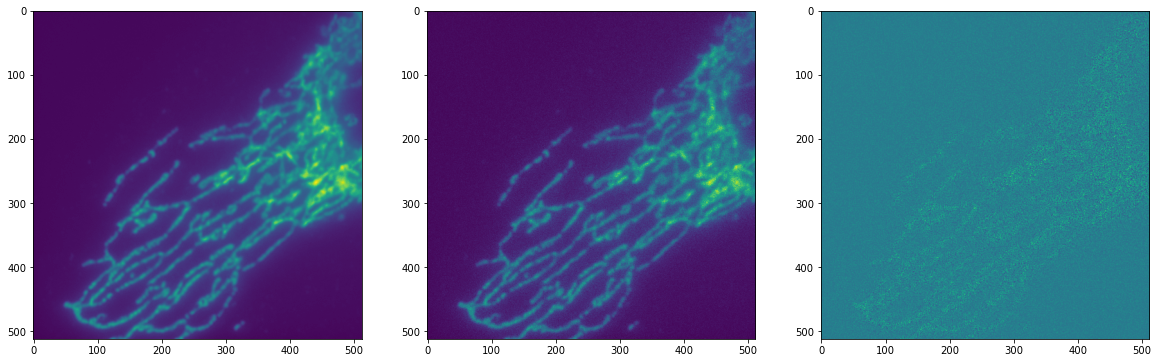

In [56]:
fig, axs = plt.subplots(1, 3,figsize=(20,10))
axs[0].imshow(test_array_gt[1,:,:])
axs[1].imshow(test_array_noisy[1,:,:])
axs[2].imshow(test_array_noisy[1,:,:]-test_array_gt[1,:,:])

In [57]:
np.savez(f"w2s_avg16_channel_{channel}.npz",train=np.array(train_patches),val=np.array(val_patches),test_GT=np.array(test_array_gt),test=np.array(test_array_noisy))